### Importing Library

In [13]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import glob

### Loading Dataset 

In [14]:
customer=pd.read_csv('customer.csv')

In [15]:
product=pd.read_csv('product.csv')

In [16]:
shipping_destination=pd.read_csv('shipping_destination.csv')

In [17]:
# path ='./trans_data/'

# all_files=glob.glob(path+"trans_fact_*.csv")

# def read_tranc_files(files):
#     for file in files:
#         yield pd.read_csv(file)
        
# transactions=pd.concat(read_tranc_files(all_files))

In [18]:
transactions.head()

,row_id,order_id,order_date,ship_date,ship_mode,customer_id,product_id,sales,quantity,discount,profit,shipping_cost,order_priority
0,49,MX-2011-127145,12-06-2011,17-06-2011,Standard Class,SF-20200,FUR-FU-10003608,26.76000,2,0.000,7.48000,2.04,High
1,51,MX-2011-168662,13-10-2011,18-10-2011,Second Class,KC-16255,OFF-SU-10003665,66.88000,4,0.000,28.72000,3.36,Medium
2,52,US-2011-150987,02-04-2011,06-04-2011,Second Class,DW-13480,TEC-CO-10003142,230.67252,3,0.402,-85.64748,9.81,Medium
3,53,US-2011-150987,02-04-2011,06-04-2011,Second Class,DW-13480,TEC-CO-10001756,172.43928,3,0.402,-3.48072,5.57,Medium
4,54,US-2011-150987,02-04-2011,06-04-2011,Second Class,DW-13480,OFF-AP-10004958,683.49600,3,0.400,-79.76400,50.13,Medium


In [20]:
tran_fact_2011=pd.read_csv('trans_fact_2011.csv')

In [21]:
tran_fact_2012=pd.read_csv('trans_fact_2012.csv')

In [22]:
tran_fact_2013=pd.read_csv('trans_fact_2013.csv')

In [23]:
tran_fact_2014=pd.read_csv('trans_fact_2014.csv')

### Data Cleaning using basic steps 

In [24]:
customer.head()

,customer_id,customer_name,segment
0,AA-10315,Alex Avila,Consumer
1,AA-10375,Allen Armold,Consumer
2,AA-10480,Andrew Allen,Consumer
3,AA-10645,Anna Andreadi,Consumer
4,AA-315,Alex Avila,Consumer


In [25]:
customer.shape

(1590, 3)

In [26]:
customer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1590 entries, 0 to 1589
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   customer_id    1590 non-null   object
 1   customer_name  1590 non-null   object
 2   segment        1590 non-null   object
dtypes: object(3)
memory usage: 37.4+ KB


In [27]:
product.head()

,product_id,category,sub_category,product_name
0,TEC-AC-10003033,Technology,Accessories,Plantronics CS510 - Over-the-Head monaural Wir...
1,FUR-CH-10003950,Furniture,Chairs,"Novimex Executive Leather Armchair, Black"
2,TEC-PH-10004664,Technology,Phones,"Nokia Smart Phone, with Caller ID"
3,TEC-PH-10004583,Technology,Phones,"Motorola Smart Phone, Cordless"
4,TEC-SHA-10000501,Technology,Copiers,"Sharp Wireless Fax, High-Speed"


In [28]:
product.shape

(10768, 4)

In [29]:
product.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10768 entries, 0 to 10767
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   product_id    10768 non-null  object
 1   category      10768 non-null  object
 2   sub_category  10768 non-null  object
 3   product_name  10768 non-null  object
dtypes: object(4)
memory usage: 336.6+ KB


In [30]:
shipping_destination.head()

,order-id,city,state,country,postal_code,market,region
0,CA-2013-103982,Round Rock,Texas,United States,78664.0,US,Central
1,ES-2012-2960821,Parla,Madrid,Spain,NaN,EU,South
2,ES-2014-5334183,Garforth,England,United Kingdom,NaN,EU,North
3,CA-2011-128055,San Francisco,California,United States,94122.0,US,West
4,ES-2014-2697033,Paris,Ile-de-France,France,NaN,EU,Central


In [31]:
shipping_destination.shape

(25724, 7)

In [32]:
shipping_destination.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25724 entries, 0 to 25723
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   order-id     25724 non-null  object 
 1   city         25724 non-null  object 
 2   state        25724 non-null  object 
 3   country      25724 non-null  object 
 4   postal_code  5009 non-null   float64
 5   market       25724 non-null  object 
 6   region       25724 non-null  object 
dtypes: float64(1), object(6)
memory usage: 1.4+ MB


In [33]:
tran_fact_2011.head()

,row_id,order_id,order_date,ship_date,ship_mode,customer_id,product_id,sales,quantity,discount,profit,shipping_cost,order_priority
0,49,MX-2011-127145,12-06-2011,17-06-2011,Standard Class,SF-20200,FUR-FU-10003608,26.76000,2,0.000,7.48000,2.04,High
1,51,MX-2011-168662,13-10-2011,18-10-2011,Second Class,KC-16255,OFF-SU-10003665,66.88000,4,0.000,28.72000,3.36,Medium
2,52,US-2011-150987,02-04-2011,06-04-2011,Second Class,DW-13480,TEC-CO-10003142,230.67252,3,0.402,-85.64748,9.81,Medium
3,53,US-2011-150987,02-04-2011,06-04-2011,Second Class,DW-13480,TEC-CO-10001756,172.43928,3,0.402,-3.48072,5.57,Medium
4,54,US-2011-150987,02-04-2011,06-04-2011,Second Class,DW-13480,OFF-AP-10004958,683.49600,3,0.400,-79.76400,50.13,Medium


In [34]:
tran_fact_2011.shape

(8998, 13)

In [35]:
tran_fact_2011.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8998 entries, 0 to 8997
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   row_id          8998 non-null   int64  
 1   order_id        8998 non-null   object 
 2   order_date      8998 non-null   object 
 3   ship_date       8998 non-null   object 
 4   ship_mode       8998 non-null   object 
 5   customer_id     8998 non-null   object 
 6   product_id      8998 non-null   object 
 7   sales           8998 non-null   float64
 8   quantity        8998 non-null   int64  
 9   discount        8998 non-null   float64
 10  profit          8998 non-null   float64
 11  shipping_cost   8998 non-null   float64
 12  order_priority  8998 non-null   object 
dtypes: float64(4), int64(2), object(7)
memory usage: 914.0+ KB


In [36]:
tran_fact_2012.head()

,row_id,order_id,order_date,ship_date,ship_mode,customer_id,product_id,sales,quantity,discount,profit,shipping_cost,order_priority
0,2,MX-2012-155047,15-10-2012,20-10-2012,Standard Class,KW-16570,FUR-FU-10004015,252.16,8,0.0,90.72,13.45,Medium
1,3,MX-2012-155047,15-10-2012,20-10-2012,Standard Class,KW-16570,FUR-BO-10002352,193.28,2,0.0,54.08,9.63,Medium
2,4,MX-2012-155047,15-10-2012,20-10-2012,Standard Class,KW-16570,OFF-BI-10004428,35.44,4,0.0,4.96,1.37,Medium
3,5,MX-2012-155047,15-10-2012,20-10-2012,Standard Class,KW-16570,OFF-AR-10004594,71.60,2,0.0,11.44,3.79,Medium
4,6,MX-2012-155047,15-10-2012,20-10-2012,Standard Class,KW-16570,OFF-EN-10001375,56.12,2,0.0,21.32,4.72,Medium


In [37]:
tran_fact_2012.shape

(10962, 13)

In [38]:
tran_fact_2012.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10962 entries, 0 to 10961
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   row_id          10962 non-null  int64  
 1   order_id        10962 non-null  object 
 2   order_date      10962 non-null  object 
 3   ship_date       10962 non-null  object 
 4   ship_mode       10962 non-null  object 
 5   customer_id     10962 non-null  object 
 6   product_id      10962 non-null  object 
 7   sales           10962 non-null  float64
 8   quantity        10962 non-null  int64  
 9   discount        10962 non-null  float64
 10  profit          10962 non-null  float64
 11  shipping_cost   10962 non-null  float64
 12  order_priority  10962 non-null  object 
dtypes: float64(4), int64(2), object(7)
memory usage: 1.1+ MB


In [39]:
tran_fact_2013.head()

,row_id,order_id,order_date,ship_date,ship_mode,customer_id,product_id,sales,quantity,discount,profit,shipping_cost,order_priority
0,7,MX-2013-134096,27-09-2013,01-10-2013,Standard Class,DP-13000,OFF-EN-10001375,56.12,2,0.0,21.32,4.11,Medium
1,8,MX-2013-134096,27-09-2013,01-10-2013,Standard Class,DP-13000,TEC-MA-10004956,344.64,3,0.0,165.42,26.20,Medium
2,9,MX-2013-134096,27-09-2013,01-10-2013,Standard Class,DP-13000,OFF-SU-10003474,97.36,4,0.0,19.44,6.86,Medium
3,10,MX-2013-134096,27-09-2013,01-10-2013,Standard Class,DP-13000,TEC-AC-10001830,341.52,2,0.0,13.64,17.34,Medium
4,11,MX-2013-134096,27-09-2013,01-10-2013,Standard Class,DP-13000,OFF-BI-10002075,12.06,3,0.0,3.48,1.13,Medium


In [40]:
tran_fact_2013.shape

(13799, 13)

In [41]:
tran_fact_2013.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13799 entries, 0 to 13798
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   row_id          13799 non-null  int64  
 1   order_id        13799 non-null  object 
 2   order_date      13799 non-null  object 
 3   ship_date       13799 non-null  object 
 4   ship_mode       13799 non-null  object 
 5   customer_id     13799 non-null  object 
 6   product_id      13799 non-null  object 
 7   sales           13799 non-null  float64
 8   quantity        13799 non-null  int64  
 9   discount        13799 non-null  float64
 10  profit          13799 non-null  float64
 11  shipping_cost   13799 non-null  float64
 12  order_priority  13799 non-null  object 
dtypes: float64(4), int64(2), object(7)
memory usage: 1.4+ MB


In [42]:
tran_fact_2014.head()

,row_id,order_id,order_date,ship_date,ship_mode,customer_id,product_id,sales,quantity,discount,profit,shipping_cost,order_priority
0,1,MX-2014-143658,02-10-2014,06-10-2014,Standard Class,SC-20575,OFF-LA-10002782,13.08,3,0.0,4.56,1.03,Medium
1,14,MX-2014-121923,24-09-2014,01-10-2014,Standard Class,PK-18910,OFF-EN-10004100,80.10,3,0.0,37.62,8.86,Low
2,15,MX-2014-135706,18-10-2014,23-10-2014,Standard Class,JK-15625,OFF-AR-10003914,132.64,4,0.0,35.76,6.20,Medium
3,16,MX-2014-135706,18-10-2014,23-10-2014,Standard Class,JK-15625,OFF-FA-10000038,12.94,1,0.0,1.02,0.46,Medium
4,24,US-2014-119753,03-10-2014,08-10-2014,Standard Class,DW-13195,OFF-BI-10003934,60.66,3,0.4,-20.22,4.00,Medium


In [43]:
tran_fact_2014.shape

(17531, 13)

In [44]:
tran_fact_2014.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17531 entries, 0 to 17530
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   row_id          17531 non-null  int64  
 1   order_id        17531 non-null  object 
 2   order_date      17531 non-null  object 
 3   ship_date       17531 non-null  object 
 4   ship_mode       17531 non-null  object 
 5   customer_id     17531 non-null  object 
 6   product_id      17531 non-null  object 
 7   sales           17531 non-null  float64
 8   quantity        17531 non-null  int64  
 9   discount        17531 non-null  float64
 10  profit          17531 non-null  float64
 11  shipping_cost   17531 non-null  float64
 12  order_priority  17531 non-null  object 
dtypes: float64(4), int64(2), object(7)
memory usage: 1.7+ MB


##### Describe()

In [45]:
tran_fact_2011.describe()

,row_id,sales,quantity,discount,profit,shipping_cost
count,8998.000000,8998.000000,8998.000000,8998.000000,8998.000000,8998.000000
mean,26160.038342,251.105901,3.494443,0.148188,27.666238,27.147264
std,14604.463560,536.893640,2.283001,0.216702,170.297204,59.876217
min,49.000000,0.852000,1.000000,0.000000,-3701.892800,0.020000
25%,13850.250000,30.405000,2.000000,0.000000,0.000000,2.620000
50%,26697.500000,84.266000,3.000000,0.000000,9.030000,7.850000
75%,38489.000000,253.863000,5.000000,0.200000,36.376200,24.457500
max,51290.000000,22638.480000,14.000000,0.800000,4630.475500,894.770000


In [46]:
tran_fact_2012.describe()

,row_id,sales,quantity,discount,profit,shipping_cost
count,10962.000000,10962.000000,10962.000000,10962.000000,10962.000000,10962.000000
mean,25332.244572,244.247281,3.476647,0.141286,28.043722,25.861329
std,14710.748220,450.299914,2.254101,0.212070,155.634683,56.592386
min,2.000000,0.984000,1.000000,0.000000,-2639.991200,0.000000
25%,12620.250000,31.620000,2.000000,0.000000,0.000000,2.650000
50%,25018.500000,87.138000,3.000000,0.000000,9.511600,7.800000
75%,37918.500000,250.012500,5.000000,0.200000,37.072500,23.560000
max,51289.000000,6354.950000,14.000000,0.850000,3177.475000,933.570000


In [47]:
tran_fact_2013.describe()

,row_id,sales,quantity,discount,profit,shipping_cost
count,13799.000000,13799.000000,13799.000000,13799.000000,13799.000000,13799.000000
mean,25192.344373,246.811106,3.488369,0.140265,29.490197,26.418577
std,15084.819782,494.719419,2.280165,0.210051,190.361319,57.082196
min,7.000000,0.836000,1.000000,0.000000,-6599.978000,0.010000
25%,11931.500000,30.816000,2.000000,0.000000,0.000000,2.620000
50%,25167.000000,85.232000,3.000000,0.000000,9.240000,7.830000
75%,38423.500000,249.720000,5.000000,0.200000,36.852000,24.965000
max,51280.000000,17499.950000,14.000000,0.800000,8399.976000,923.630000


In [48]:
tran_fact_2014.describe()

,row_id,sales,quantity,discount,profit,shipping_cost
count,17531.000000,17531.000000,17531.000000,17531.000000,17531.000000,17531.000000
mean,25933.970966,245.272139,3.457989,0.143291,28.758540,26.268197
std,14733.584100,477.630355,2.290856,0.211830,174.283412,56.545259
min,1.000000,0.444000,1.000000,0.000000,-3839.990400,0.010000
25%,13169.500000,30.354000,2.000000,0.000000,0.000000,2.570000
50%,25826.000000,84.480000,3.000000,0.000000,9.200000,7.720000
75%,38803.500000,251.130000,5.000000,0.200000,36.808500,24.455000
max,51284.000000,13999.960000,14.000000,0.800000,6719.980800,867.690000


### Exploratory Data Analysis

#### Merge data

##### Combining transaction datasets

In [49]:
transactions = pd.concat([tran_fact_2011, tran_fact_2012, tran_fact_2013, tran_fact_2014])

In [50]:
transactions = transactions.merge(customer, on='customer_id', how='left')
transactions = transactions.merge(product, on='product_id', how='left')

In [51]:
transactions.columns

Index(['row_id', 'order_id', 'order_date', 'ship_date', 'ship_mode',
       'customer_id', 'product_id', 'sales', 'quantity', 'discount', 'profit',
       'shipping_cost', 'order_priority', 'customer_name', 'segment',
       'category', 'sub_category', 'product_name'],
      dtype='object')

In [52]:
# columns_to_drop = ['customer_name_x', 'segment_x', 'category_x', 'sub_category_x', 'product_name_x',
#                    'customer_name_y', 'segment_y', 'category_y', 'sub_category_y', 'product_name_y']
# cleaned_df = transactions.drop(columns=columns_to_drop, axis=1)

In [53]:
# cleaned_df = cleaned_df.dropna()
cleaned_df = transactions

In [54]:
# cleaned_df = cleaned_df.rename(columns={'customer_name': 'customer_name', 'segment': 'segment',
#                                         'category': 'category', 'sub_category': 'sub_category',
#                                         'product_name': 'product_name'})

In [55]:
cleaned_df.head()

,row_id,order_id,order_date,ship_date,ship_mode,customer_id,product_id,sales,quantity,discount,profit,shipping_cost,order_priority,customer_name,segment,category,sub_category,product_name
0,49,MX-2011-127145,12-06-2011,17-06-2011,Standard Class,SF-20200,FUR-FU-10003608,26.76000,2,0.000,7.48000,2.04,High,Sarah Foster,Consumer,Furniture,Furnishings,"Tenex Light Bulb, Erganomic"
1,49,MX-2011-127145,12-06-2011,17-06-2011,Standard Class,SF-20200,FUR-FU-10003608,26.76000,2,0.000,7.48000,2.04,High,Sarah Foster,Consumer,Furniture,Furnishings,"Advantus Light Bulb, Black"
2,51,MX-2011-168662,13-10-2011,18-10-2011,Second Class,KC-16255,OFF-SU-10003665,66.88000,4,0.000,28.72000,3.36,Medium,Karen Carlisle,Corporate,Office Supplies,Supplies,"Kleencut Trimmer, Serrated"
3,51,MX-2011-168662,13-10-2011,18-10-2011,Second Class,KC-16255,OFF-SU-10003665,66.88000,4,0.000,28.72000,3.36,Medium,Karen Carlisle,Corporate,Office Supplies,Supplies,"Stiletto Letter Opener, Steel"
4,52,US-2011-150987,02-04-2011,06-04-2011,Second Class,DW-13480,TEC-CO-10003142,230.67252,3,0.402,-85.64748,9.81,Medium,Dianna Wilson,Home Office,Technology,Copiers,"Hewlett Fax and Copier, Laser"


In [56]:
shipping_destination.head()

,order-id,city,state,country,postal_code,market,region
0,CA-2013-103982,Round Rock,Texas,United States,78664.0,US,Central
1,ES-2012-2960821,Parla,Madrid,Spain,NaN,EU,South
2,ES-2014-5334183,Garforth,England,United Kingdom,NaN,EU,North
3,CA-2011-128055,San Francisco,California,United States,94122.0,US,West
4,ES-2014-2697033,Paris,Ile-de-France,France,NaN,EU,Central


In [66]:
merged_df = cleaned_df.merge(shipping_destination, on='order_id', how='left')

In [67]:
merged_df.columns

Index(['row_id', 'order_id', 'order_date', 'ship_date', 'ship_mode',
       'customer_id', 'product_id', 'sales', 'quantity', 'discount', 'profit',
       'shipping_cost', 'order_priority', 'customer_name', 'segment',
       'category', 'sub_category', 'product_name', 'year', 'city', 'state',
       'country', 'postal_code', 'market', 'region'],
      dtype='object')

In [60]:
print("Columns in cleaned_df:", cleaned_df.columns)
print("Columns in shipping_destination:", shipping_destination.columns)

Columns in cleaned_df: Index(['row_id', 'order_id', 'order_date', 'ship_date', 'ship_mode',
       'customer_id', 'product_id', 'sales', 'quantity', 'discount', 'profit',
       'shipping_cost', 'order_priority', 'customer_name', 'segment',
       'category', 'sub_category', 'product_name'],
      dtype='object')
Columns in shipping_destination: Index(['order-id', 'city', 'state', 'country', 'postal_code', 'market',
       'region'],
      dtype='object')


In [61]:
shipping_destination.rename(columns={'order-id': 'order_id'}, inplace=True)

In [62]:
# Convert 'order_date' and 'ship_date' to datetime format
transactions['order_date'] = pd.to_datetime(transactions['order_date'], format='%d-%m-%Y')
transactions['ship_date'] = pd.to_datetime(transactions['ship_date'], format='%d-%m-%Y')

### Sales Trends Over the Years

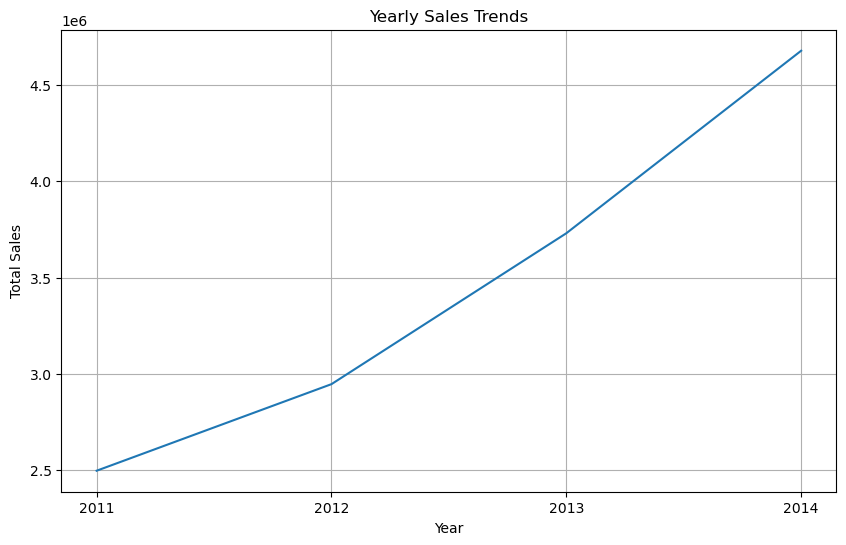

In [63]:
transactions['year'] = transactions['order_date'].dt.year
yearly_sales = transactions.groupby('year')['sales'].sum()

plt.figure(figsize=(10, 6))
sns.lineplot(data=yearly_sales)
plt.title('Yearly Sales Trends')
plt.xlabel('Year')
plt.ylabel('Total Sales')
plt.xticks(yearly_sales.index)
plt.grid(True)
plt.show()

### Sales by Product Category

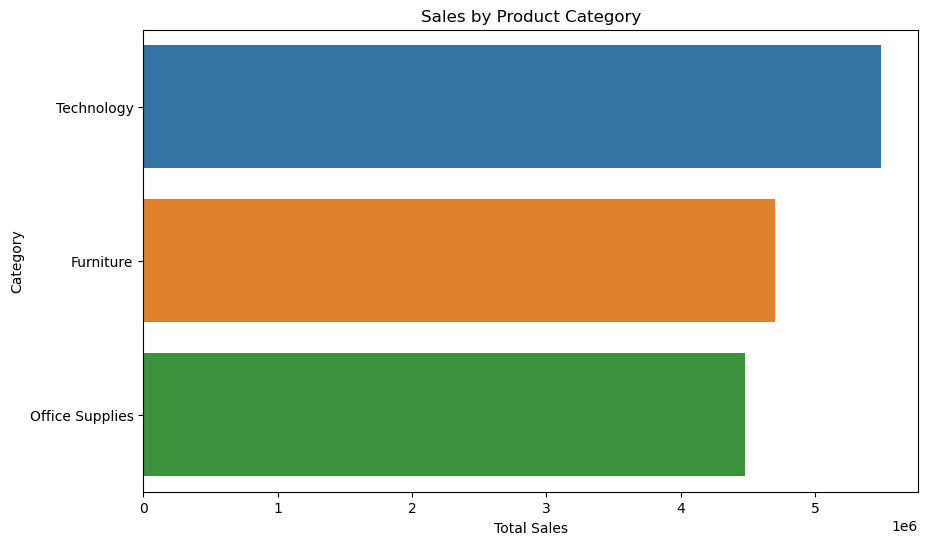

In [68]:
category_sales = merged_df.groupby('category')['sales'].sum().sort_values(ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x=category_sales.values, y=category_sales.index)
plt.title('Sales by Product Category')
plt.xlabel('Total Sales')
plt.ylabel('Category')
plt.show()

### Sales by Market

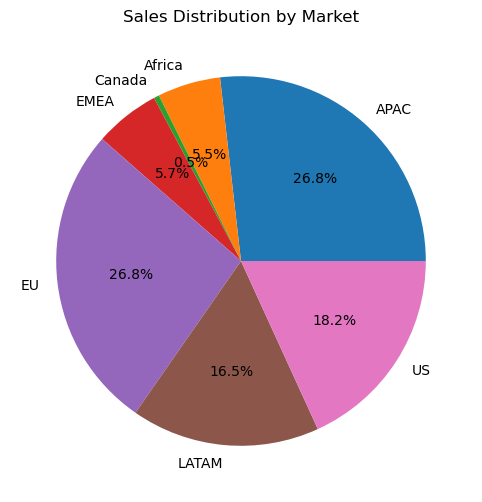

In [69]:
plt.figure(figsize=(10, 6))
market_sales = merged_df.groupby('market')['sales'].sum()
market_sales.plot(kind='pie', autopct='%1.1f%%')
plt.title('Sales Distribution by Market')
plt.ylabel('')
plt.show()

### Discount Impact on Profit

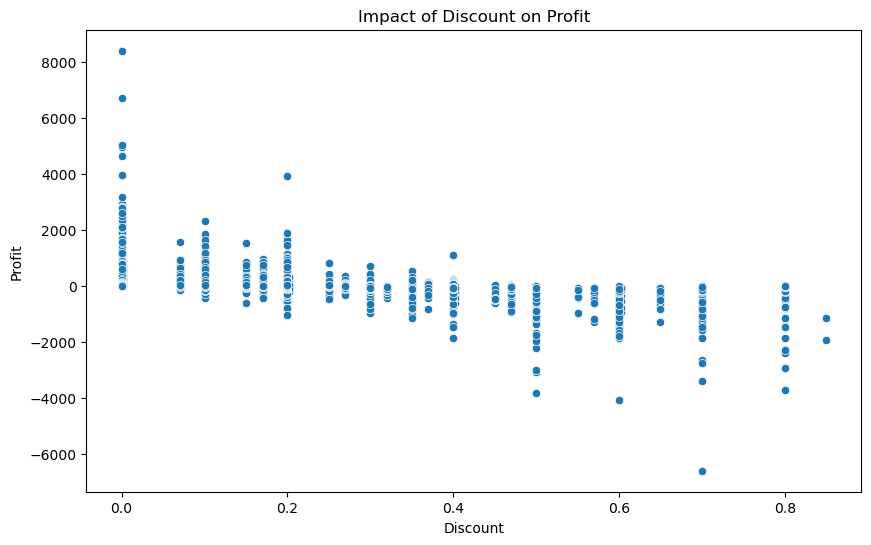

In [70]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=transactions, x='discount', y='profit')
plt.title('Impact of Discount on Profit')
plt.xlabel('Discount')
plt.ylabel('Profit')
plt.show()

### Sales by Region

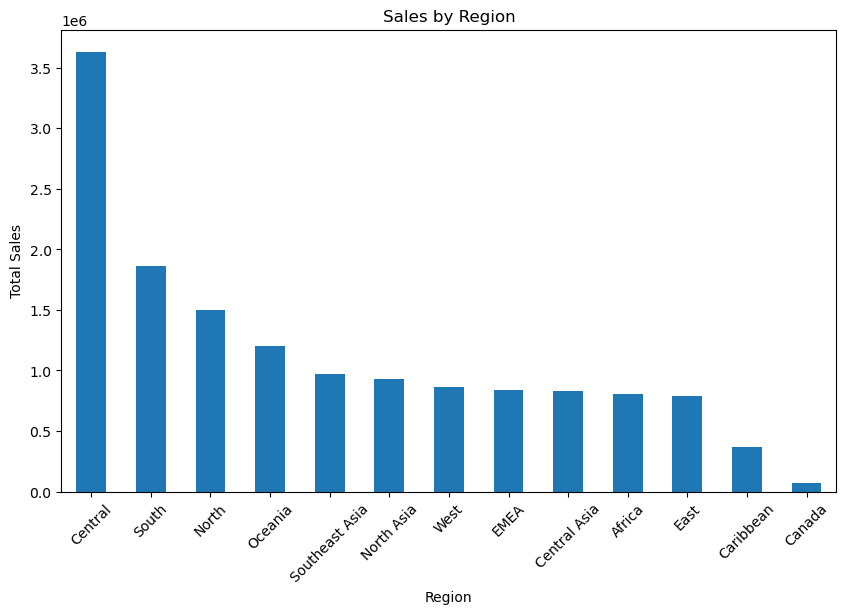

In [71]:
plt.figure(figsize=(10, 6))
sales_by_region = merged_df.groupby('region')['sales'].sum().sort_values(ascending=False)
sales_by_region.plot(kind='bar')
plt.title('Sales by Region')
plt.xlabel('Region')
plt.ylabel('Total Sales')
plt.xticks(rotation=45)
plt.show()

### Sales trend over time

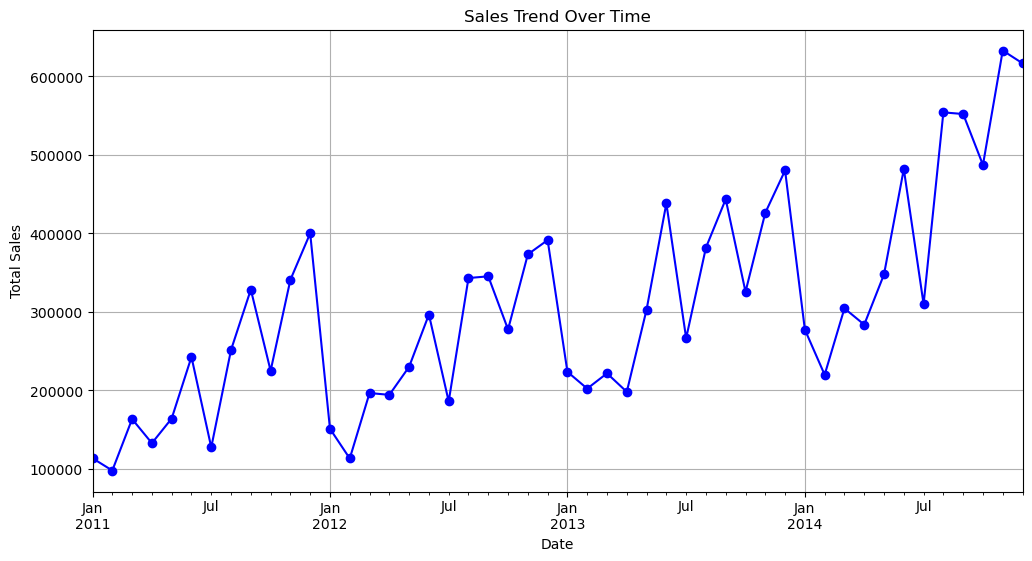

In [72]:
plt.figure(figsize=(12, 6))
merged_df['order_date'] = pd.to_datetime(merged_df['order_date'])  # Convert order_date to datetime if not already
sales_trend = merged_df.resample('M', on='order_date')['sales'].sum()
sales_trend.plot(kind='line', marker='o', color='blue')
plt.title('Sales Trend Over Time')
plt.xlabel('Date')
plt.ylabel('Total Sales')
plt.grid(True)
plt.show()

### Profit Margin by Product Category

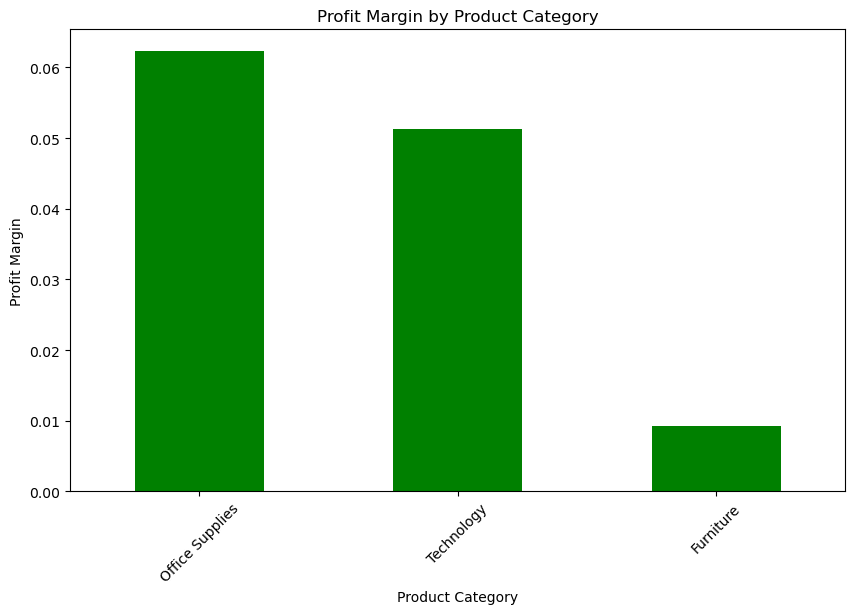

In [74]:
plt.figure(figsize=(10, 6))
merged_df['profit_margin'] = merged_df['profit'] / merged_df['sales']
profit_margin_by_category = merged_df.groupby('category')['profit_margin'].mean().sort_values(ascending=False)
profit_margin_by_category.plot(kind='bar', color='green')
plt.title('Profit Margin by Product Category')
plt.xlabel('Product Category')
plt.ylabel('Profit Margin')
plt.xticks(rotation=45)
plt.show()

### Quantity Sold Distribution:

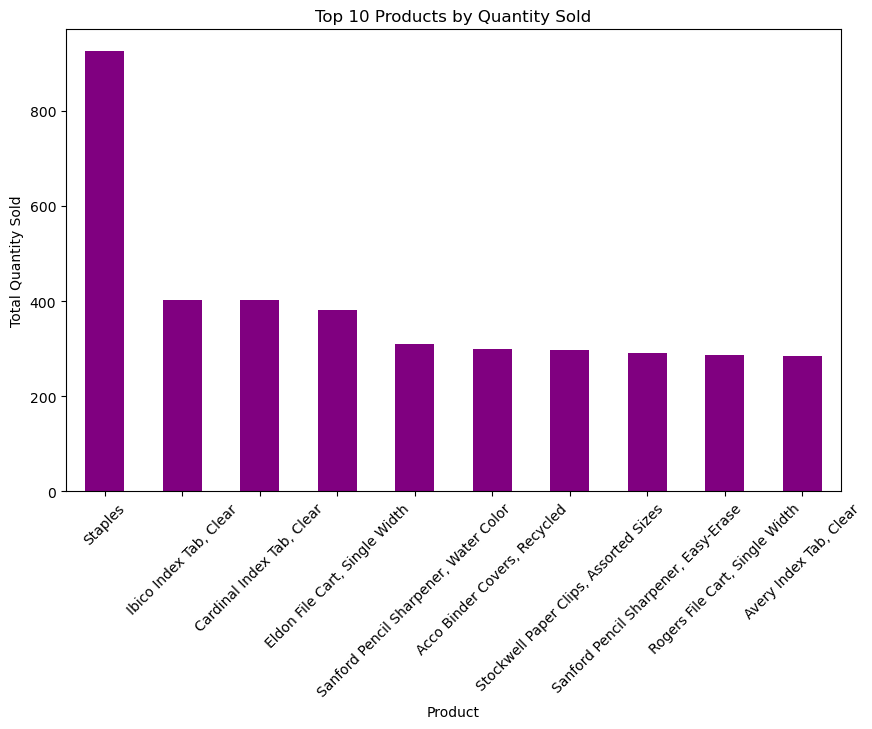

In [75]:
plt.figure(figsize=(10, 6))
quantity_distribution = merged_df.groupby('product_name')['quantity'].sum().sort_values(ascending=False)[:10]
quantity_distribution.plot(kind='bar', color='purple')
plt.title('Top 10 Products by Quantity Sold')
plt.xlabel('Product')
plt.ylabel('Total Quantity Sold')
plt.xticks(rotation=45)
plt.show()

### Growth percentage for each Segment over Time

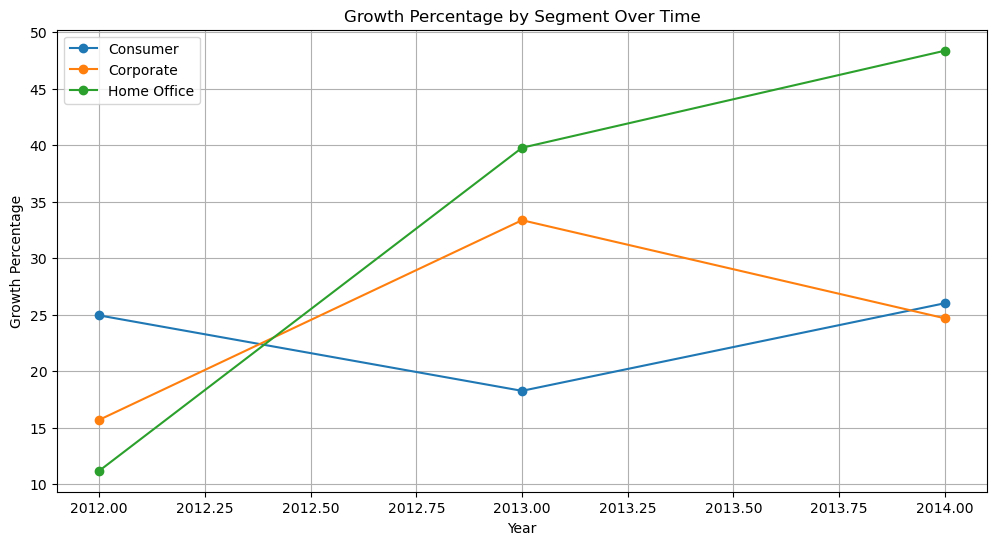

In [76]:
segment_year_sales = merged_df.groupby(['segment', merged_df['order_date'].dt.year])['sales'].sum().unstack()

growth_percentage = segment_year_sales.pct_change(axis='columns') * 100

plt.figure(figsize=(12, 6))

for segment in growth_percentage.index:
    plt.plot(growth_percentage.columns, growth_percentage.loc[segment], marker='o', label=segment)

plt.title('Growth Percentage by Segment Over Time')
plt.xlabel('Year')
plt.ylabel('Growth Percentage')
plt.legend()
plt.grid(True)
plt.show()

### Total Sales for each Segment over Time

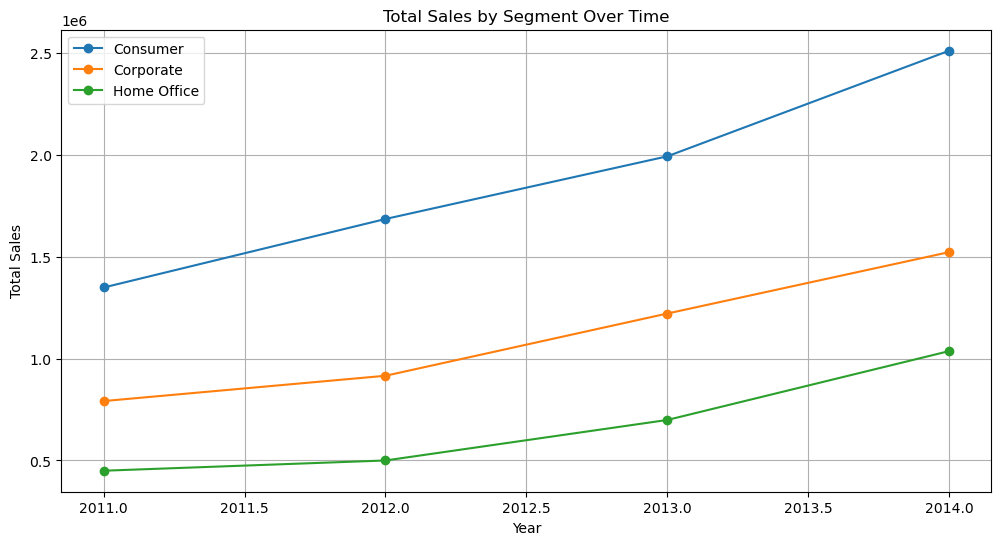

In [77]:
segment_year_sales = merged_df.groupby(['segment', merged_df['order_date'].dt.year])['sales'].sum().unstack()

plt.figure(figsize=(12, 6))

for segment in segment_year_sales.index:
    plt.plot(segment_year_sales.columns, segment_year_sales.loc[segment], marker='o', label=segment)

plt.title('Total Sales by Segment Over Time')
plt.xlabel('Year')
plt.ylabel('Total Sales')
plt.legend()
plt.grid(True)
plt.show()

### Shipping Mode Preferences

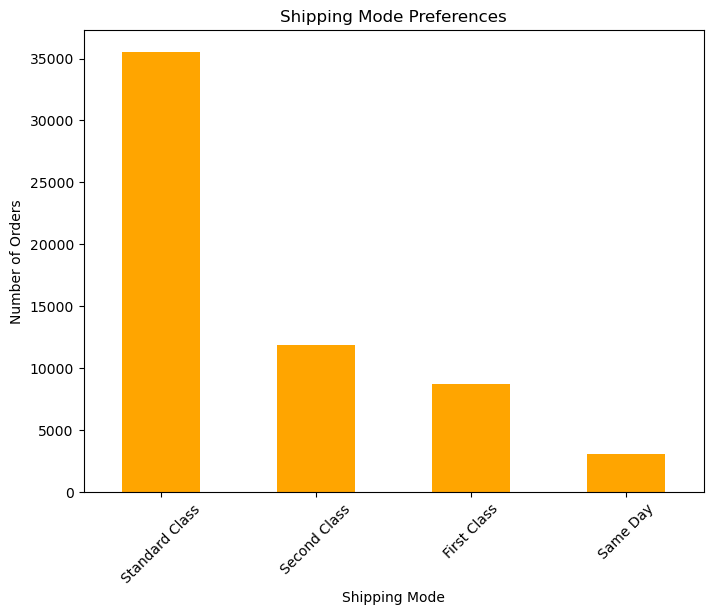

In [78]:
plt.figure(figsize=(8, 6))
shipping_mode_distribution = merged_df['ship_mode'].value_counts()
shipping_mode_distribution.plot(kind='bar', color='orange')
plt.title('Shipping Mode Preferences')
plt.xlabel('Shipping Mode')
plt.ylabel('Number of Orders')
plt.xticks(rotation=45)
plt.show()

### Customer Segment Distribution using pie chart 

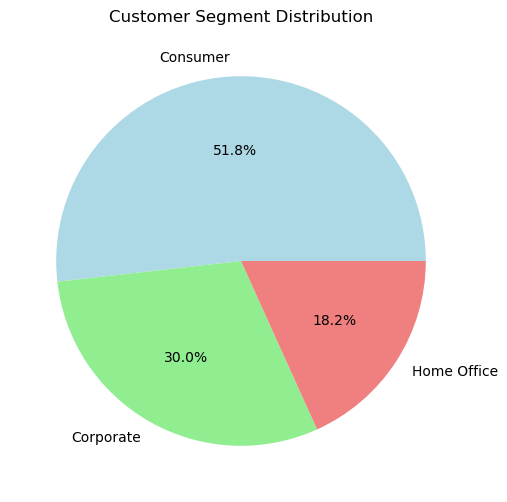

In [79]:
plt.figure(figsize=(8, 6))
segment_distribution = merged_df['segment'].value_counts()
segment_distribution.plot(kind='pie', autopct='%1.1f%%', colors=['lightblue', 'lightgreen', 'lightcoral'])
plt.title('Customer Segment Distribution')
plt.ylabel('')
plt.show()

### Sales Distribution by Category and Sub-Category

<Figure size 1200x600 with 0 Axes>

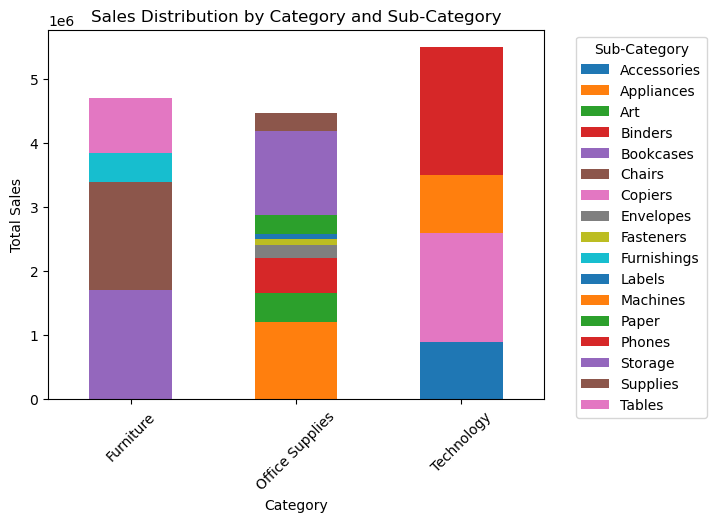

In [94]:
plt.figure(figsize=(12, 6))
category_sales = merged_df.groupby(['category', 'sub_category'])['sales'].sum().unstack()
category_sales.plot(kind='bar', stacked=True)
plt.title('Sales Distribution by Category and Sub-Category')
plt.xlabel('Category')
plt.ylabel('Total Sales')
plt.xticks(rotation=45)
plt.legend(title='Sub-Category', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

### Shipping Cost Distribution by Shipping Mode

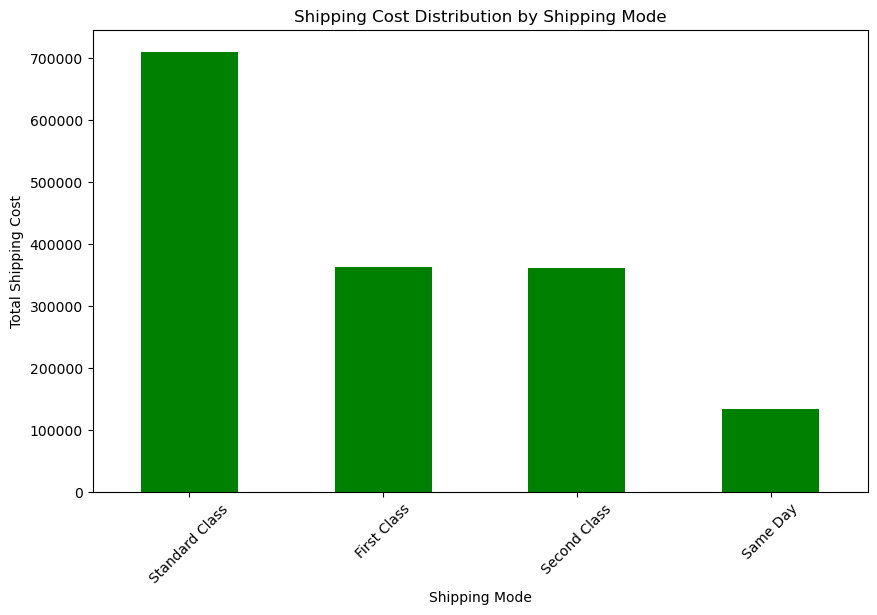

In [97]:
plt.figure(figsize=(10, 6))
shipping_cost_distribution = merged_df.groupby('ship_mode')['shipping_cost'].sum().sort_values(ascending=False)
shipping_cost_distribution.plot(kind='bar', color='green')
plt.title('Shipping Cost Distribution by Shipping Mode')
plt.xlabel('Shipping Mode')
plt.ylabel('Total Shipping Cost')
plt.xticks(rotation=45)
plt.show()

### Shipping Cost vs. Sales

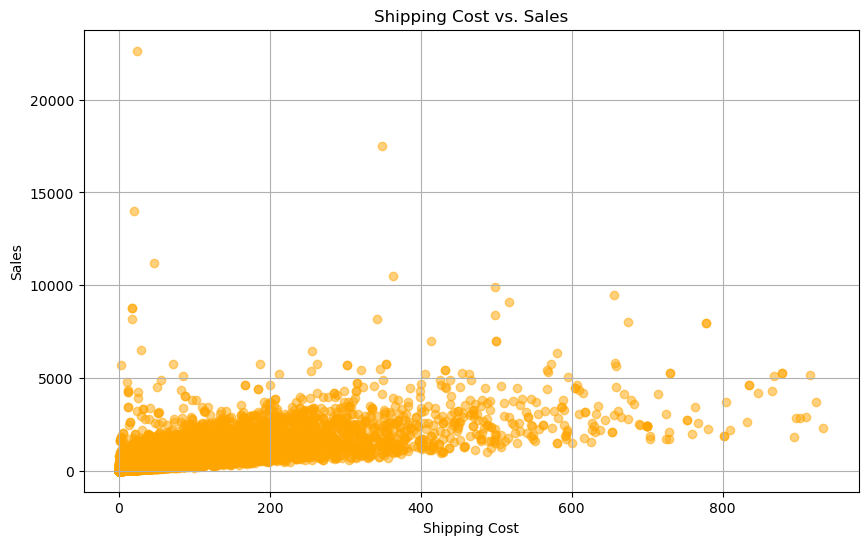

In [96]:
plt.figure(figsize=(10, 6))
plt.scatter(merged_df['shipping_cost'], merged_df['sales'], color='orange', alpha=0.5)
plt.title('Shipping Cost vs. Sales')
plt.xlabel('Shipping Cost')
plt.ylabel('Sales')
plt.grid(True)
plt.show()

### Order Priority Distribution

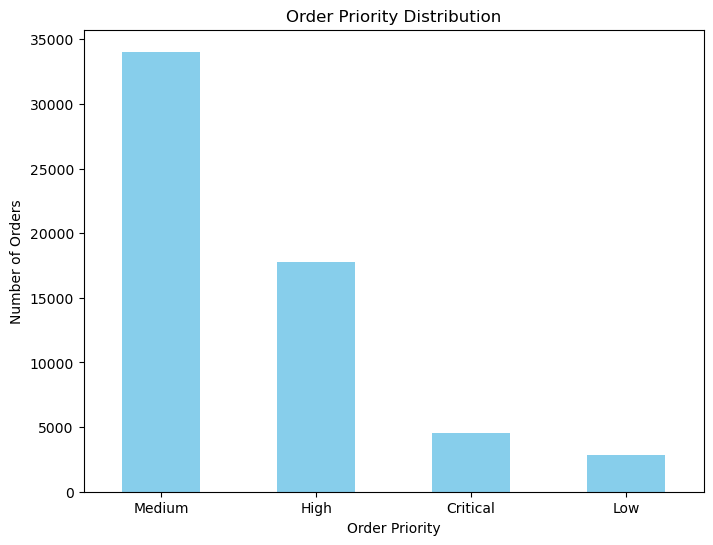

In [98]:
plt.figure(figsize=(8, 6))
order_priority_distribution = merged_df['order_priority'].value_counts()
order_priority_distribution.plot(kind='bar', color='skyblue')
plt.title('Order Priority Distribution')
plt.xlabel('Order Priority')
plt.ylabel('Number of Orders')
plt.xticks(rotation=0)
plt.show()

### Average Profit Margin by Order Priority

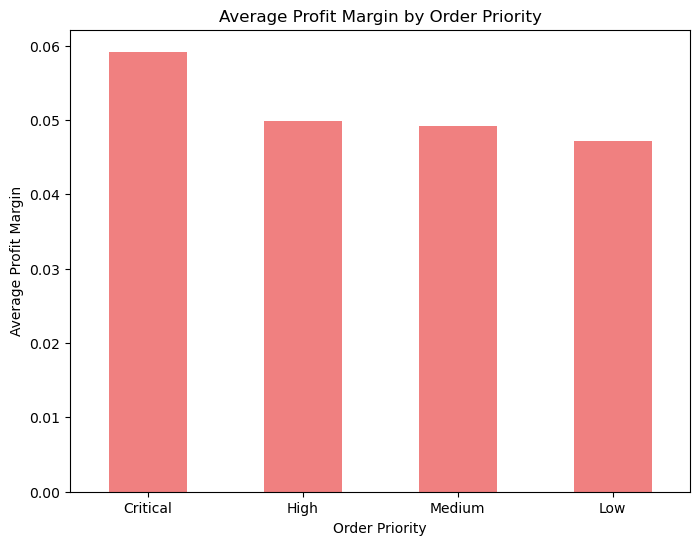

In [99]:
plt.figure(figsize=(8, 6))
profit_margin_by_priority = merged_df.groupby('order_priority')['profit_margin'].mean().sort_values(ascending=False)
profit_margin_by_priority.plot(kind='bar', color='lightcoral')
plt.title('Average Profit Margin by Order Priority')
plt.xlabel('Order Priority')
plt.ylabel('Average Profit Margin')
plt.xticks(rotation=0)
plt.show()


### Top 10 Customer Distribution by Country

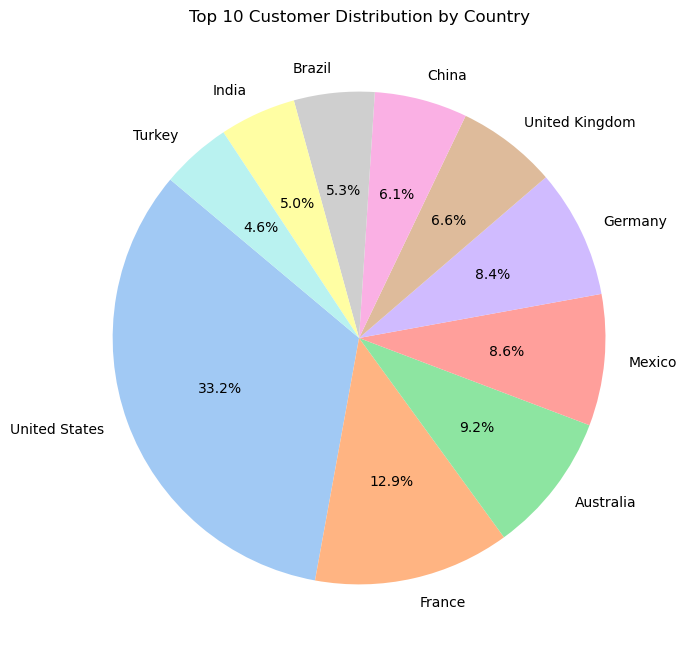

In [100]:
plt.figure(figsize=(8, 8))
customer_distribution_by_country = merged_df['country'].value_counts().head(10)
customer_distribution_by_country.plot(kind='pie', autopct='%1.1f%%', colors=sns.color_palette('pastel'), startangle=140)
plt.title('Top 10 Customer Distribution by Country')
plt.ylabel('')  # Remove y-axis label
plt.show()

### Sales Heatmap by Country and State

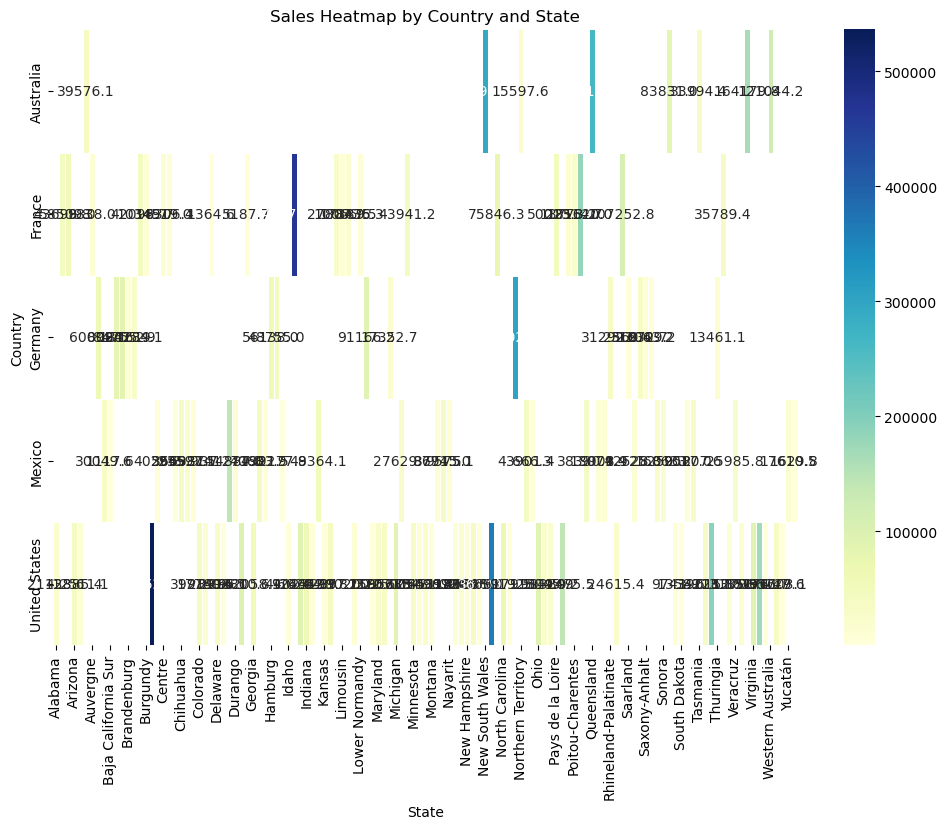

In [101]:
top_countries = merged_df['country'].value_counts().head(5).index
filtered_data = merged_df[merged_df['country'].isin(top_countries)]

plt.figure(figsize=(12, 8))
sales_heatmap = filtered_data.groupby(['country', 'state'])['sales'].sum().unstack()
sns.heatmap(sales_heatmap, cmap='YlGnBu', annot=True, fmt=".1f", linewidths=.5)
plt.title('Sales Heatmap by Country and State')
plt.xlabel('State')
plt.ylabel('Country')
plt.show()

### Total Sales of 5 Low-Performing Products

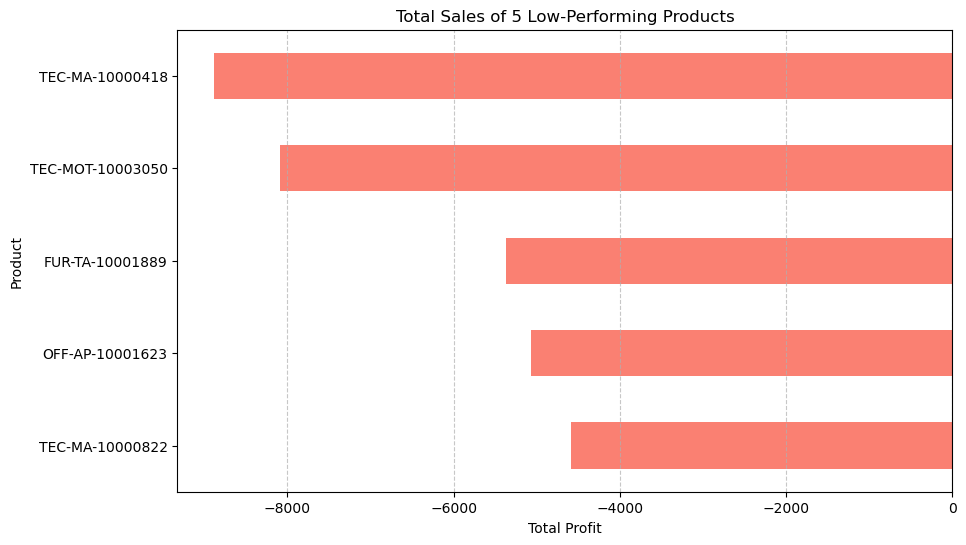

In [116]:
total_sales = merged_df.groupby('product_id')['profit'].sum().sort_values(ascending=True)

# Extract the 5 lowest performing products
low_performing_products = total_sales.head(5)

# Plot total sales for the 5 low-performing products
plt.figure(figsize=(10, 6))
low_performing_products.plot(kind='barh', color='salmon')
plt.title('Total Sales of 5 Low-Performing Products')
plt.xlabel('Total Profit')
plt.ylabel('Product')
plt.gca().invert_yaxis()  # Invert y-axis to display the product with the lowest sales on top
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.show()

In [119]:
[product_id=='TEC-MA-10000418'].describe()

NameError: name 'product_id' is not defined

### Top 5 Performing Products

Top 5 Performing Products:
Apple Smart Phone, Full Size: $89230.78
Cisco Smart Phone, Full Size: $86874.09
Motorola Smart Phone, Full Size: $77783.67
Nokia Smart Phone, Full Size: $74770.05
Canon imageCLASS 2200 Advanced Copier: $61599.82


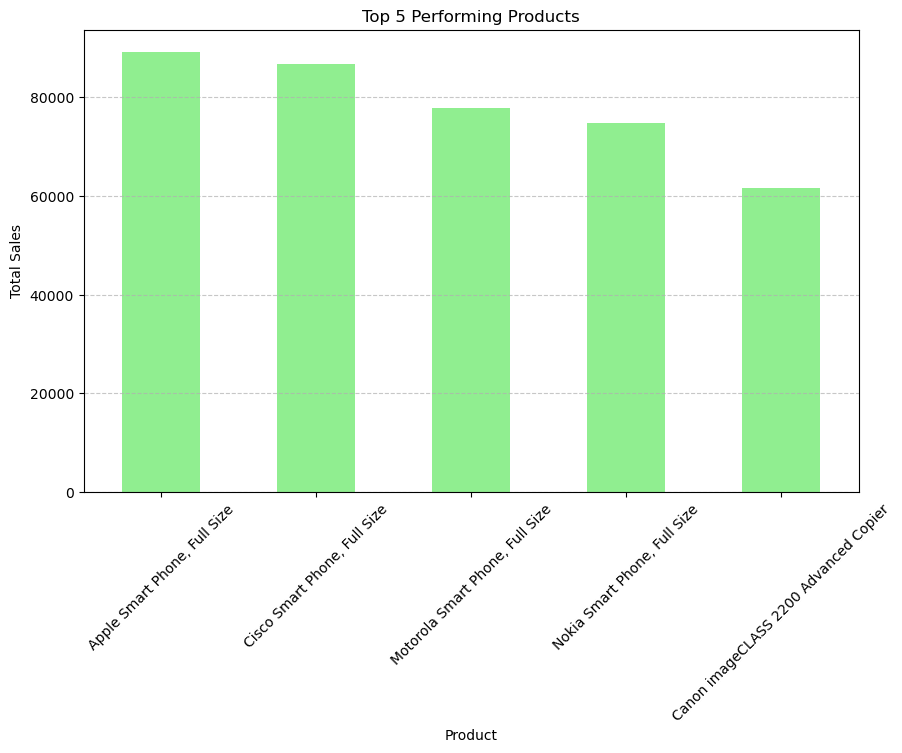

In [103]:
total_sales = merged_df.groupby('product_name')['sales'].sum().sort_values(ascending=False)

# Extract the top 5 performing products
top_performing_products = total_sales.head(5)

# Print the top 5 performing products and their revenue contribution
print("Top 5 Performing Products:")
for product, sales in top_performing_products.items():
    print(f"{product}: ${sales:.2f}")

# Plot the top 5 performing products
plt.figure(figsize=(10, 6))
top_performing_products.plot(kind='bar', color='lightgreen')
plt.title('Top 5 Performing Products')
plt.xlabel('Product')
plt.ylabel('Total Sales')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()